In [1]:
#Import libraries

import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

# <h1><center><span style="color:#9FC9C9">Data Overview</span></center></h1>

In [31]:
df=pd.read_csv("...\\chess_games.csv",index_col=["game_id"])
df.head(3)

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation


# <h1><center><span style="color:#9FC9C9">EDA</span></center></h1>

## <span style="color:#957DAD">What percentage of games were won by white? How many ended in a draw?</span> 

In [25]:
fig=px.pie(df["winner"].value_counts(),names=df["winner"].value_counts().index,values=df["winner"].value_counts().values,
           title="Percentage of Winners",
            color_discrete_sequence=["#FEC8D8","#D291BC"," #E0BBE4"],
           labels={"names":"Player","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#957DAD",paper_bgcolor="#fff",title_font_size=20,title_x=.45,font_color="#957DAD",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#957DAD",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

## <span style="color:#957DAD">What percentage of games are won by the player with the higher rating?</span> 

In [26]:
sample=df[["winner","white_rating","black_rating"]].rename(columns={"white_rating":"white","black_rating":"black"})
sample.head()

,winner,white,black
game_id,,,
1,White,1500,1191
2,Black,1322,1261
3,White,1496,1500
4,White,1439,1454
5,White,1523,1469


In [27]:
sample["w>b"]=(sample["white"] > sample["black"])
sample 

,winner,white,black,w>b
game_id,,,,
1,White,1500,1191,True
2,Black,1322,1261,True
3,White,1496,1500,False
4,White,1439,1454,False
5,White,1523,1469,True
...,...,...,...,...
20054,White,1691,1220,True
20055,Black,1233,1196,True
20056,White,1219,1286,False


In [28]:
mask=((sample["winner"]=="White" )& (sample["w>b"]==True)) | ((sample["winner"]=="Black") & (sample["w>b"]==False))
sample["high_winn"]="low_rank win"
sample.loc[mask,"high_winn"]="high_rank win"
sample

,winner,white,black,w>b,high_winn
game_id,,,,,
1,White,1500,1191,True,high_rank win
2,Black,1322,1261,True,low_rank win
3,White,1496,1500,False,low_rank win
4,White,1439,1454,False,low_rank win
5,White,1523,1469,True,high_rank win
...,...,...,...,...,...
20054,White,1691,1220,True,high_rank win
20055,Black,1233,1196,True,low_rank win
20056,White,1219,1286,False,low_rank win


In [29]:
fig=px.pie(sample["high_winn"].value_counts(),names=sample["high_winn"].value_counts().index,values=sample["high_winn"].value_counts().values,
           title="Winning Situation",
            color_discrete_sequence=["#FADEC3","#F7B39C"],
           labels={"names":"Situation ","values":"Count "}
      )
fig.update_layout(
title_font_color="#F29696",paper_bgcolor="#fff",title_font_size=20,title_x=.45,font_color="#F29696",
    plot_bgcolor="#F29696",legend_title_font_size=17,legend_title_font_color="#F29696",
    legend_title_text="Situation")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

## <span style="color:#957DAD">Which opening move was most frequently used in games in which black won? What about when white won?</span> 

In [13]:
# Column of the opening moves
df["opening_move"]=df["moves"].str.slice(0,2)
black=df[df["winner"]=="Black"].opening_move.value_counts().nlargest(10)
black

e4    5651
d4    2043
c4     305
Nf     292
e3     255
g3      95
b3      83
f4      82
d3      79
Nc      55
Name: opening_move, dtype: int64

In [14]:
fig=px.bar(y=black.index,x=black.values,
           title="most used oppening moves, black wins".title(),
            color_discrete_sequence=["#C08082"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#C87A56",paper_bgcolor="#fff",title_font_size=20,title_x=.5,font_color="#C87A56",
    plot_bgcolor="#fff",legend_title_font_size=17,legend_title_font_color="#C87A56",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#C87A56")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

In [15]:
white=df[df["winner"]=="White"].opening_move.value_counts().nlargest(10)
fig=px.bar(y=white.index,x=white.values,
           title="most used oppening moves, White wins".title(),
            color_discrete_sequence=["#E5BBA2"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#C87A56",paper_bgcolor="#fff",title_font_size=20,title_x=.5,font_color="#C87A56",
    plot_bgcolor="#fff",legend_title_font_size=17,legend_title_font_color="#C87A56",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#C87A56")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=True)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

## <span style="color:#957DAD">What is the most significant opening technique?</span>

In [16]:
opening=df["opening_shortname"].value_counts().nlargest(5)
opening

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Italian Game          981
King's Pawn Game      917
Name: opening_shortname, dtype: int64

In [17]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
            color_discrete_sequence=["#96BCDE"],
           labels={"x":"Count ","y":"Move "},
           text=opening.values
      )
fig.update_layout(
title_font_color="#1D3663",paper_bgcolor="#fff",title_font_size=20,title_x=.5,font_color="#1D3663",
    plot_bgcolor="#fff",legend_title_font_size=17,legend_title_font_color="#1D3663",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#1D3663")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=False)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

# <h1><center><span style="color:#9FC9C9">Statistical Analysis</span></center></h1>

<h4><center><span style="color:#4e5c61">Is the white player more likely to win the game or not?</span></center></h4>

## <span style="color:#957DAD">Confidence Interval</span> 

In [36]:
df["winner"].value_counts(normalize=True)

White    0.498604
Black    0.454033
Draw     0.047363
Name: winner, dtype: float64

In [19]:
# Make sample distribution from the data
sample_distribution=[]
for _ in range(5000):
    # making samples from the main data
    sample=df.sample(len(df),replace=True)
    diff=sample["winner"].value_counts(normalize=True)[0]-sample["winner"].value_counts(normalize=True)[1]
    sample_distribution.append(diff)

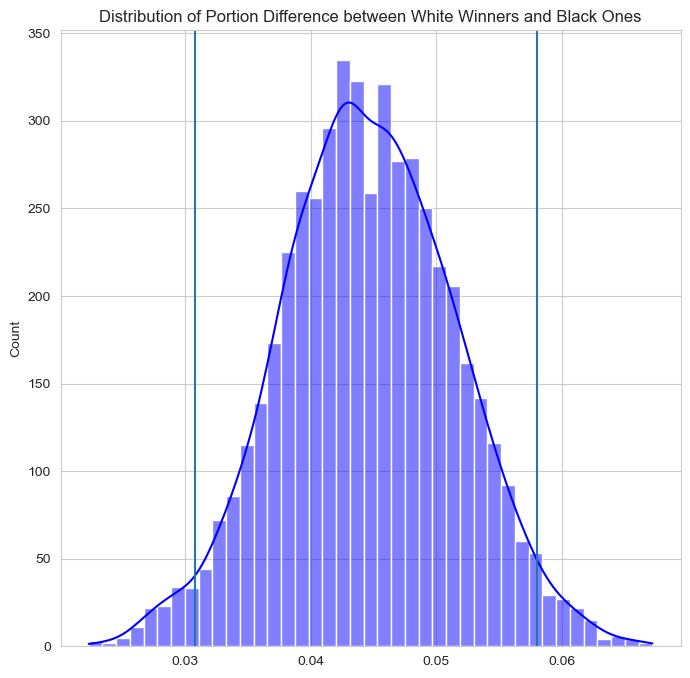

In [41]:
# Plot the sample distribution
plt.figure(figsize=(8,8))
sns.histplot(sample_distribution,kde=True,color="blue")
plt.title("Distribution of Portion Difference between White Winners and Black Ones")
plt.axvline(np.percentile(sample_distribution,2.5)) 
plt.axvline(np.percentile(sample_distribution,97.5))

In [21]:
np.percentile(sample_distribution,2.5),np.percentile(sample_distribution,97.5)

(0.030810649117559097, 0.05803295443214677)

### <span style="color:#4e5c61">Answer the question</span>
From the plot, we are 95% sure that the difference in postion of is in the interval [ .03 , .05 ], which means that
<span style="color:#8B0000"> the white winner is more likely to win the game, </span> but by small amount

## <span style="color:#957DAD">Hyphothesis Testing</span> 

- Null Hypothesis: portion of white winners <= portion of black winners. [difference =< 0]
- Alternative Hypothesis: portion of white winners > portion of black winners. [difference >0]
<p> what is the steps</p>

In [22]:
# The difference assuming the null hypothesis
null_diff=0
# The std of the sample distribution
std= np.std(sample_distribution)
# Make the normal distribution using the sample std and null_diff
normal=np.random.normal(loc=0,scale=std,size=5000)

Text(0.5, 1.0, 'Distribution of Portion Difference assuming the Null Hypothesis')

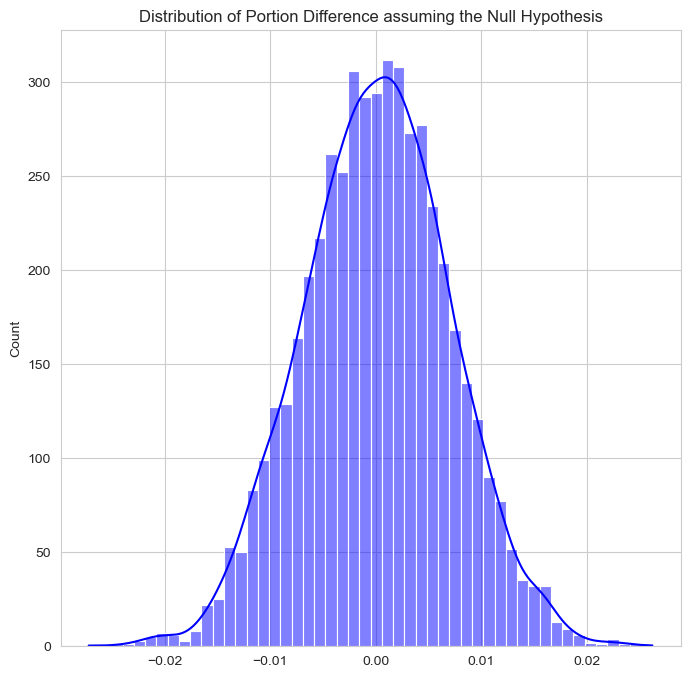

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(normal,kde=True,color="blue")
plt.title("Distribution of Portion Difference assuming the Null Hypothesis")

### <span style="color:#4e5c61">P-value</span>
 Assuming the Null Hypothesis , what is the p-value?

In [40]:
sample_statistic=(sample["winner"].value_counts(normalize=True)[0])-(sample["winner"].value_counts(normalize=True)[1])
sample_statistic

0.044570744839964094

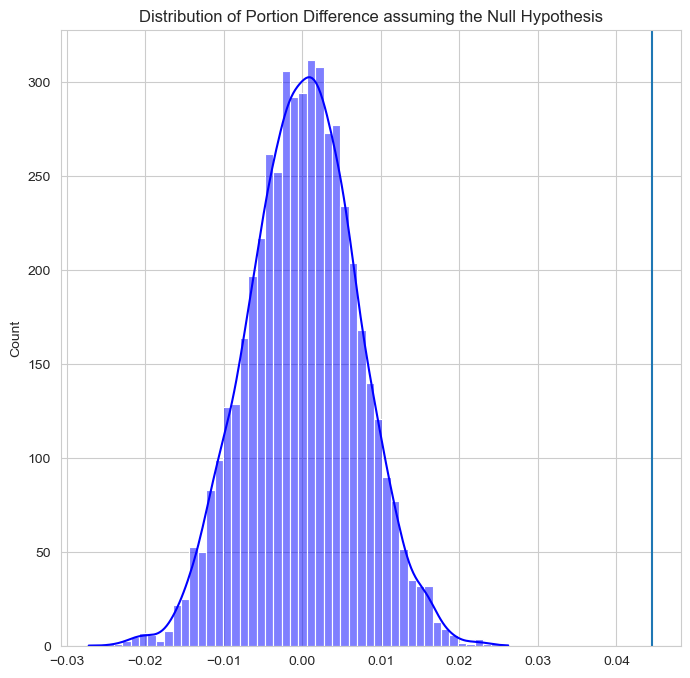

In [42]:
# Plot the statistic
plt.figure(figsize=(8,8))
sns.histplot(normal,kde=True,color="blue")
plt.title("Distribution of Portion Difference assuming the Null Hypothesis")
plt.axvline(sample_statistic)

In [25]:
p_value= (normal>sample_statistic).mean()
p_value

0.0

### <span style="color:#4e5c61">Answer the question</span>
The p-value = 0 so the Null Hypothesis is rejected, which means that
<span style="color:#8B0000"> the white winner is more likely to win the game, </span> but by small amount